#Pattern detection

In this article it is explained the chessboard pattern and how it is detected. The pattern is used in the calibration processes.

##Chessboard pattern

In [1]:
# Pattern parameters
rows = 6
columns = 11
square_width = 13

In [9]:
import cv2

# Load image
image = cv2.imread('/home/jesus/code/3DScanScience/notebooks/images/4.2 Camera calibration/captures/frame0.jpg')

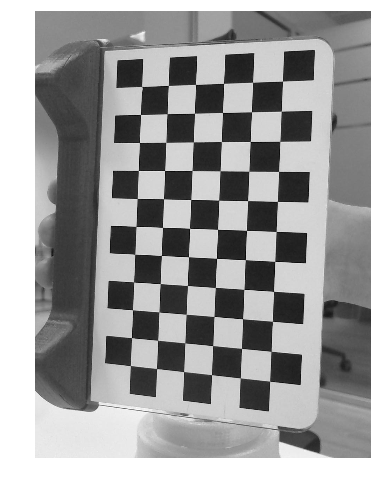

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_image(image):
    f, axarr = plt.subplots(1, 1, figsize=(8,8))
    axarr.axis('off')
    axarr.imshow(image)
    axarr.plot()

plot_image(image)

##Corners detection

###Find corners

In [4]:
# Convert image to 1 channel
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Find the chess board corners
ret, corners = cv2.findChessboardCorners(gray, (columns, rows), flags=cv2.CALIB_CB_FAST_CHECK)

###Subpixel accuracy

In [5]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Find corners with subpixel accuracy
corners = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)

###Draw corners

In [6]:
# Draw corners into image
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
cv2.drawChessboardCorners(image, (columns, rows), corners, ret)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

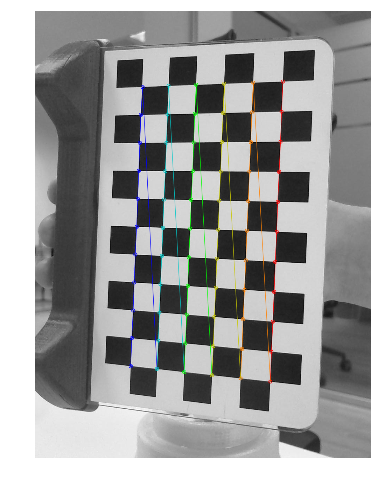

In [7]:
# Show image
plot_image(image)

##Pose detection
Pose refers to the coordinate system of the pattern. It is represented by a Rotation matrix and a Traslation vector. In order to determine this values Camera intrinsics parameters are needed. Those values are obtained in [Camera calibration](http://nbviewer.ipython.org/github/Jesus89/3DScanScience/blob/master/notebooks/4.2.%20Camera%20calibration.ipynb).


![](http://nbviewer.ipython.org/github/Jesus89/3DScanScience/blob/master/notebooks/images/4.1.%20Pattern%20detection/pattern_pose.png)

In [8]:
import numpy as np

# Compute object points
objp = np.zeros((rows * columns, 3), np.float32)
objp[:, :2] = np.mgrid[0:columns, 0:rows].T.reshape(-1, 2)
objp *= square_width

# Camera calibration results
camera_matrix = np.array([[1430, 0, 480],[0, 1430, 640],[0, 0, 1]])
distortion_coefficients = np.array([0.0, 0.0, 0.0, 0.0, 0.0])

# Compute pose
ret, rvecs, tvecs = cv2.solvePnP(objp, corners, camera_matrix, distortion_coefficients)

if ret:
    R = cv2.Rodrigues(rvecs)[0]
    t = tvecs.T[0]
    n = R.T[2]
    d = np.dot(n, t)
    print("\nRotation matrix\n\n{0}\n".format(R))
    print("\nTranslation vector\n\n{0} mm\n".format(t))
    print("\nPlane normal\n\n{0}\n".format(n))
    print("\nPlane distance\n\n{0} mm\n".format(d))


Rotation matrix

[[-0.04096853 -0.96650225  0.25336728]
 [ 0.99915986 -0.03990222  0.00934819]
 [ 0.00107487  0.2535374   0.96732499]]


Translation vector

[  34.44493845  -65.9290978   216.55043397] mm


Plane normal

[ 0.25336728  0.00934819  0.96732499]


Plane distance

217.5855485049173 mm



#References